# Quick and dirty maps with matplotlib and cartopy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# We will use cartopy to draw maps
import cartopy
import cartopy.crs as ccrs

%matplotlib inline

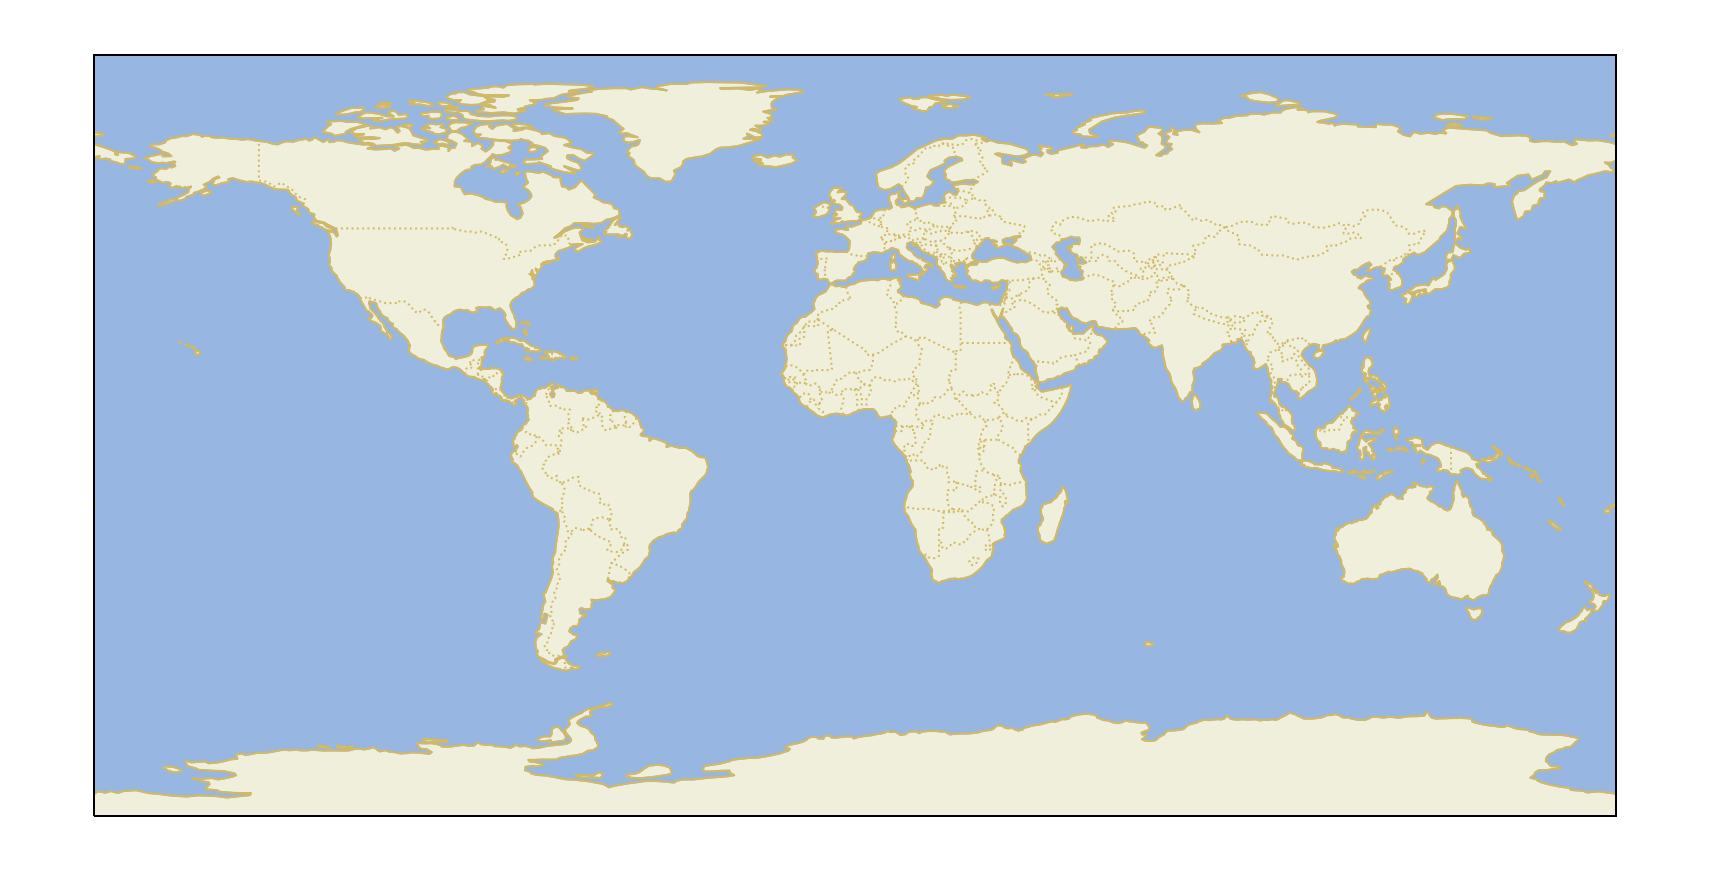

In [2]:
map_proj = ccrs.PlateCarree(central_longitude=0.0, globe=None)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=map_proj)


ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='#D3B962')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':', edgecolor='#D3B962')

In [3]:
df_plants_eu = pd.read_csv('./data/conventional_power_plants_EU.csv', index_col=0)
df_plants_de = pd.read_csv('./data/conventional_power_plants_DE.csv', index_col=0)

df_plants_eu = df_plants_eu.dropna(subset=['lat', 'lon'], how='any')
df_plants_de = df_plants_de.dropna(subset=['lat', 'lon'], how='any')

In [4]:
df_plants_eu.head(2)

,company,street,postcode,city,country,capacity,energy_source,technology,additional_info,type,chp,commissioned,comment,source,eic_code,lat,lon,energy_source_level_1,energy_source_level_2,energy_source_level_3
name,,,,,,,,,,,,,,,,,,,,
AL-1,NUON,Marketkant 12-10,1341AK,Almere,NL,62.0,Natural gas,NaN,NaN,NaN,NaN,NaN,NaN,Tennet_Q1,NaN,52.38811,5.2154,Fossil fuels,Natural gas,NaN
AL-2,NUON,Markerkant 12-10,1341AK,Almere,NL,55.0,Natural gas,NaN,NaN,NaN,NaN,NaN,NaN,Tennet_Q4,NaN,52.38811,5.2154,Fossil fuels,Natural gas,NaN


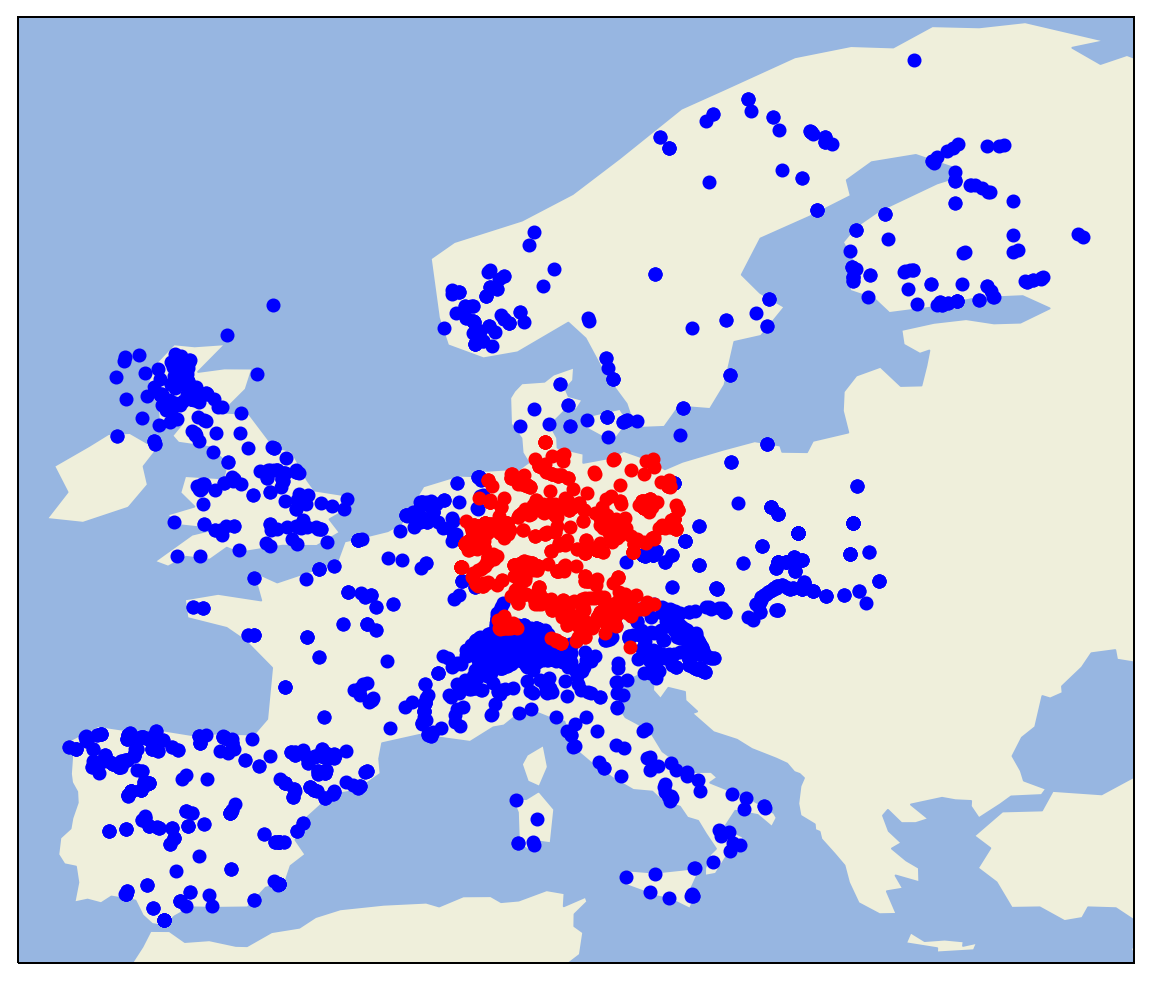

In [5]:
map_proj = ccrs.PlateCarree(central_longitude=0.0, globe=None)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=map_proj)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)

# Plot all EU plants in blue
plt.plot(
    df_plants_eu.lon, df_plants_eu.lat,
    color='blue', lw=0, marker='o',
    transform=map_proj
)

# Plot all German plants in red
plt.plot(
    df_plants_de.lon, df_plants_de.lat,
    color='red', lw=0, marker='o',
    transform=map_proj
)

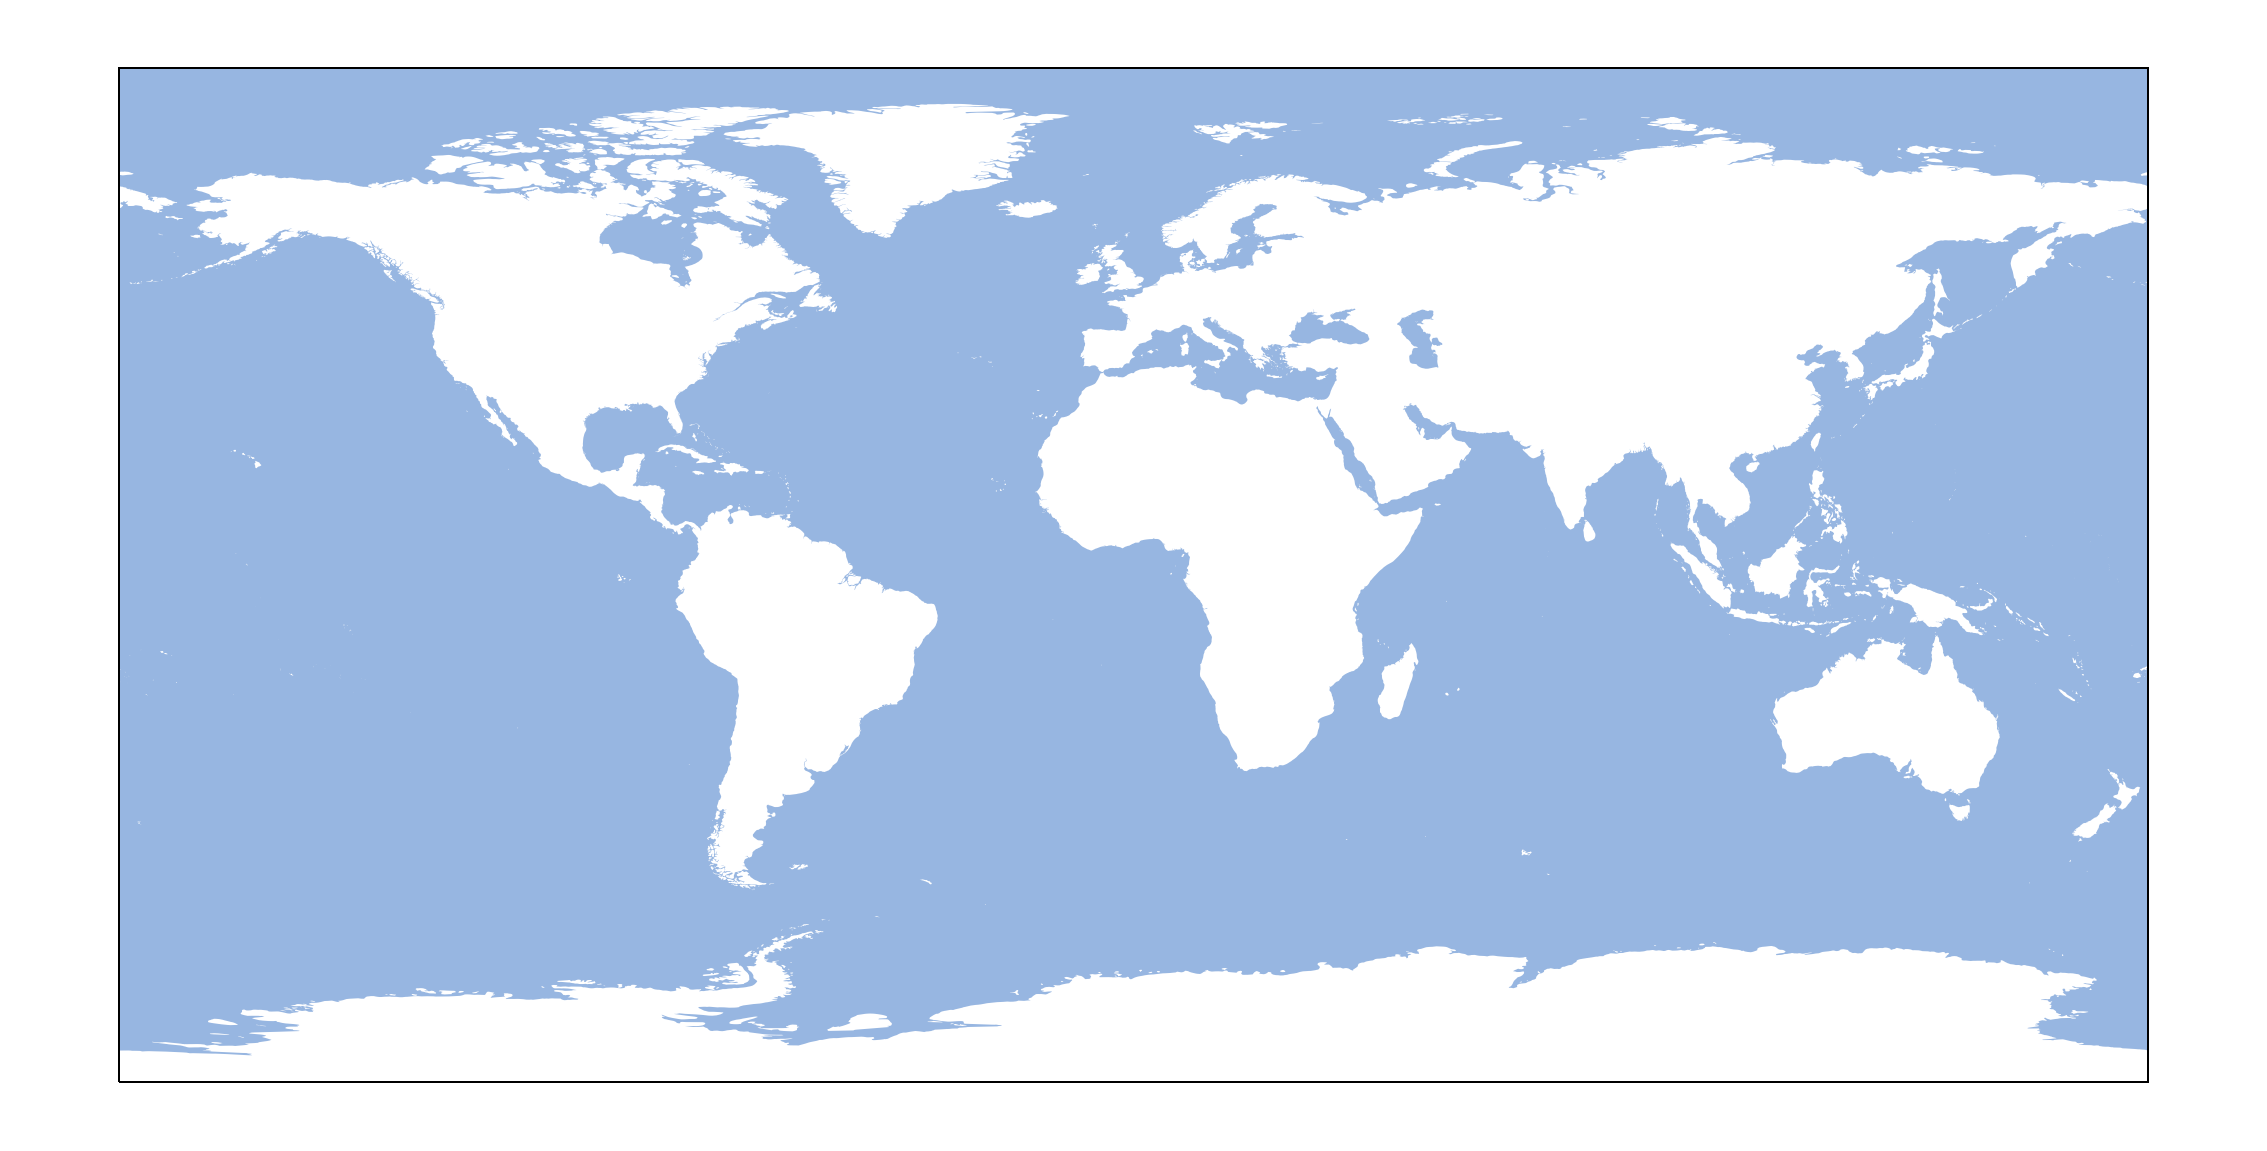

In [6]:
# You can easily add custom features, e.g. higher-resolution Natural Earth layers

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

ocean_50m = cartopy.feature.NaturalEarthFeature(
    'physical', 'ocean', '50m',
    facecolor=cartopy.feature.COLORS['water']
)

ax.add_feature(ocean_50m)

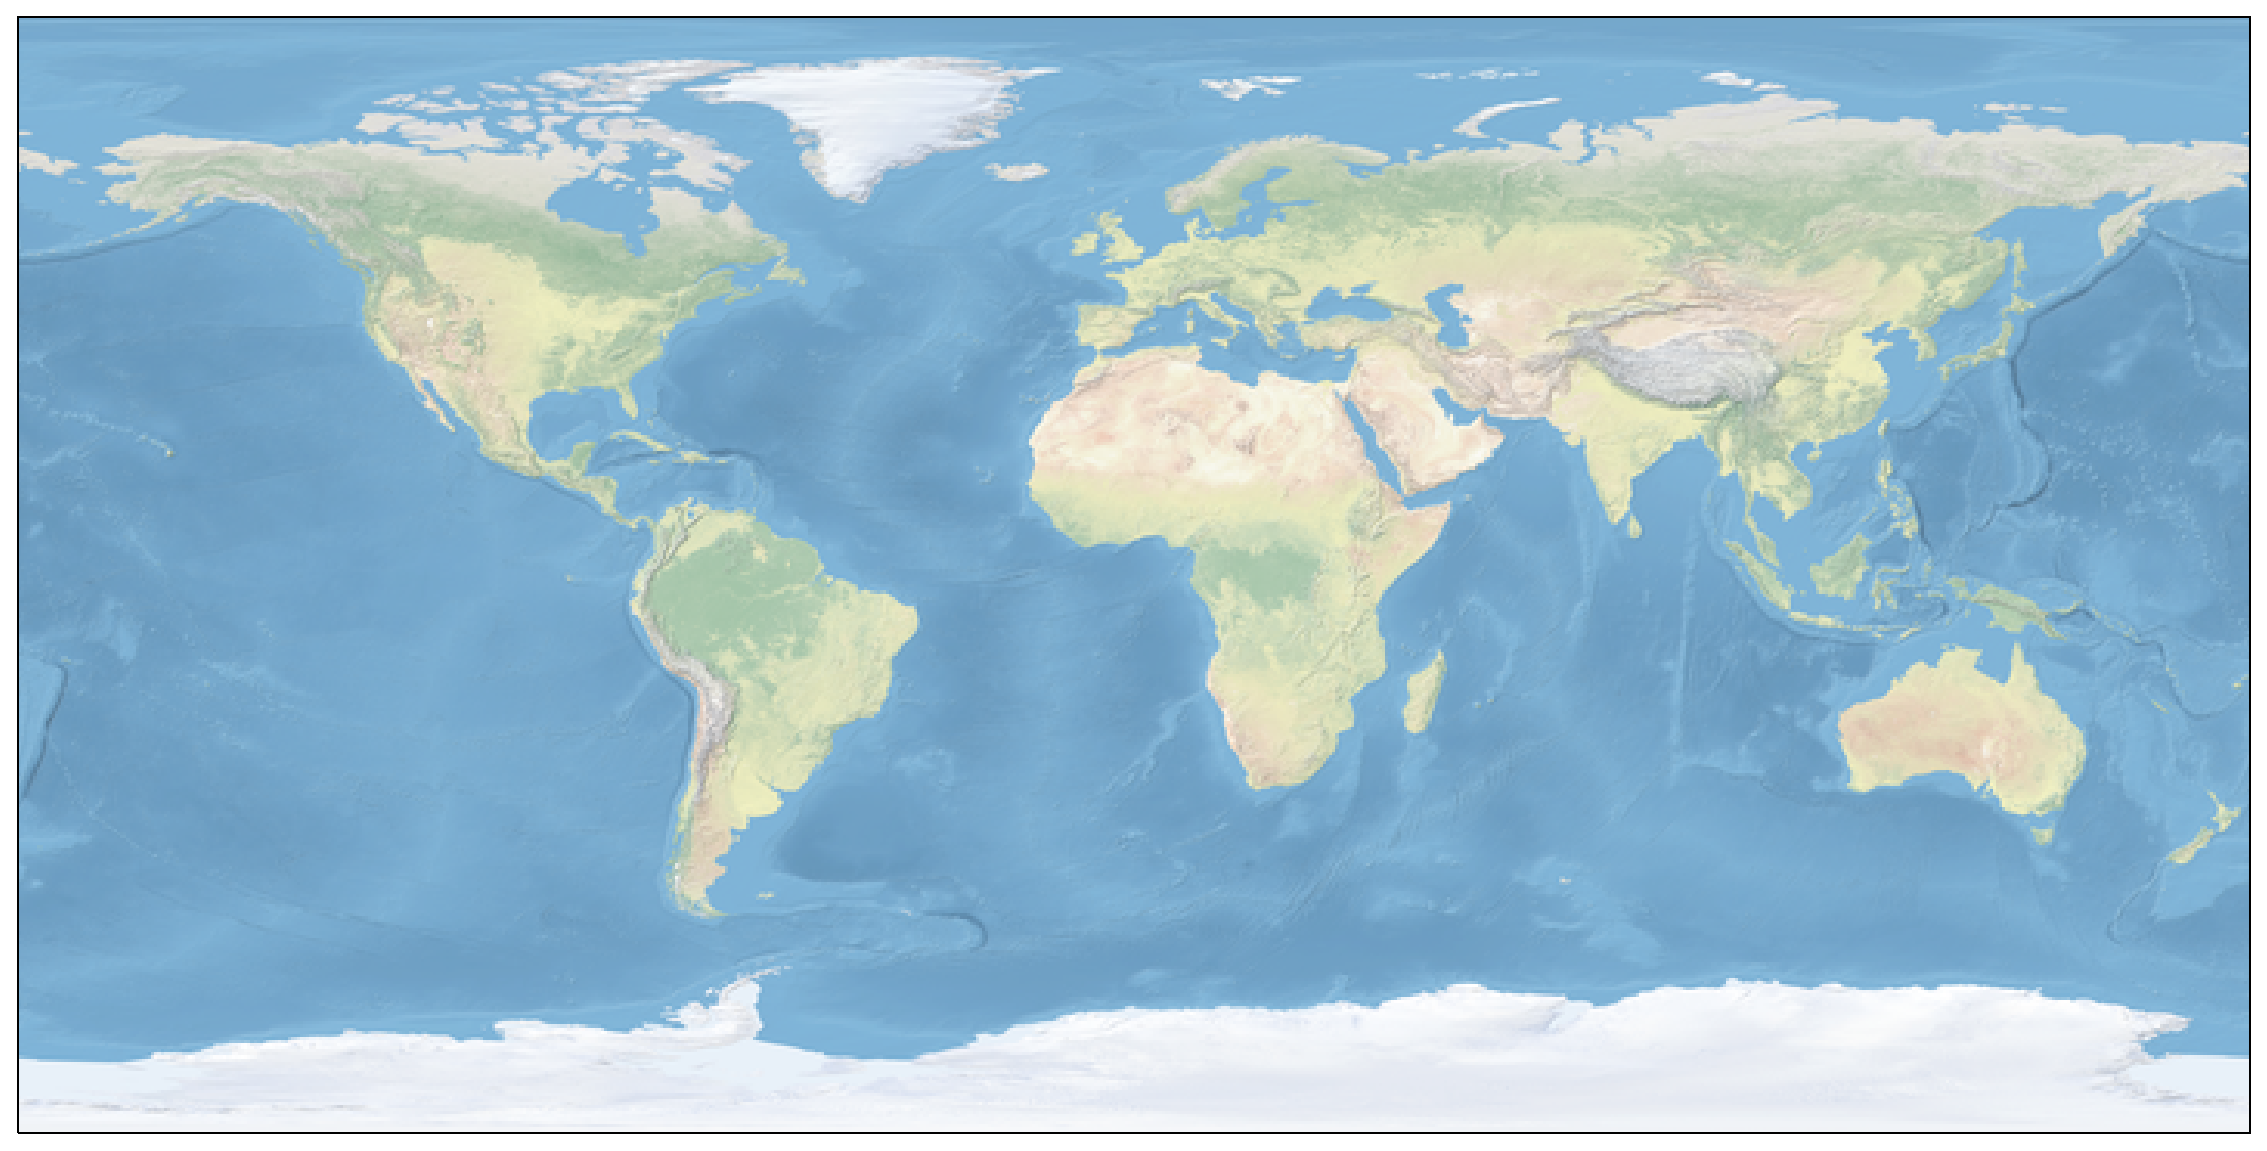

In [7]:
# Or a stock physical map background

fig = plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

ax.stock_img()

## Further reading

Other examples:
    
    
* Using Enipedia data to map the world's nuclear power plants (2014): https://www.pfenninger.org/posts/mapping-the-worlds-nuclear-power-plants